## ICCLIM C4I: Calculate the percentage of days when Tmax > 90th percentile (TX90p)


Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the percentage of days when Tmax > 90th percentil (TX90p indicator) for the dataset chosen by the user on C4I.

The data is read using xarray and a plot of the time series over a specific region is generated, as well as an average spatial map. Several output types examples are shown.

The dataset that is expected for this notebook are tasmax parameter (needed to calculate the TX90p indicator) for one specific climate model and experiment as well as one member. The time period should be continuous.

The following time period is considered: 2081-01-01 to 2100-12-31 using the period 1981-01-01 to 2000-12-31 as a reference. Plots are shown over European region.

### Preparation of the needed modules

In [1]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import xarray as xr
import dask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)

import xclim
from distributed import Client
import logging

client = Client(memory_limit='16GB', n_workers=1, threads_per_worker=2, silence_logs=logging.ERROR)

dask.config.set({"array.slicing.split_large_chunks": False})

dask.config.set({"distributed.worker.memory.target": "0.8"})
dask.config.set({"distributed.worker.memory.spill": "0.9"})
dask.config.set({"distributed.worker.memory.pause": "0.95"})
dask.config.set({"distributed.worker.memory.terminate": "0.98"})

dask.config.set({"array.chunk-size": "100 MB"})

print("xclim: ", xclim.__version__)
print("dask: ", dask.__version__)
print("xarray: ", xr.__version__)
print("icclim: ", icclim.__version__)
print("cftime: ", cftime.__version__)

python:  3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
numpy:  1.21.5
pandas:  1.3.5
xclim:  0.33.2
dask:  2022.01.0
xarray:  0.20.2
icclim:  5.0.2
cftime:  1.5.1.1


### Specification of the parameters and period of interest

In [2]:
# studied period
dt1 = datetime.datetime(2081,1,1)
dt2 = datetime.datetime(2100,12,31)

# reference period
dt1r = datetime.datetime(1981,1,1)
dt2r = datetime.datetime(2000,12,31)

out_f = 'tx90p_icclim.nc'
filenames = glob.glob('./data/latest/tasmax_day*.nc')

icclim.index(index_name='TX90p', in_files=filenames, var_name='tasmax', slice_mode='JJA', base_period_time_range=[dt1r, dt2r], time_range=[dt1, dt2], out_unit='%', out_file=out_f, logs_verbosity='HIGH')


2022-02-11 17:55:55,626    ********************************************************************************************
2022-02-11 17:55:55,627    *                                                                                          *
2022-02-11 17:55:55,627    *          icclim                5.0.2   *
2022-02-11 17:55:55,627    *                                                                                          *
2022-02-11 17:55:55,628    *                                                                                          *
2022-02-11 17:55:55,628    *          Fri Feb 11 16:55:55 2022                                                    *
2022-02-11 17:55:55,629    *                                                                                          *
2022-02-11 17:55:55,629    *          BEGIN EXECUTION                                                                 *
2022-02-11 17:55:55,630    *                                                                  

<xarray.Dataset>
Dimensions:      (lat: 256, lon: 512, time: 20, bounds: 2)
Coordinates:
  * lat          (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon          (lon) float64 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
    height       float64 2.0
  * time         (time) datetime64[ns] 2081-07-16T12:00:00 ... 2100-07-16T12:...
  * bounds       (bounds) int64 0 1
Data variables:
    TX90p        (time, lat, lon) float64 dask.array<chunksize=(1, 128, 256), meta=np.ndarray>
    time_bounds  (time, bounds) datetime64[ns] 2081-06-01 ... 2100-08-31
Attributes:
    title:        ECA heat index TX90p
    references:   ATBD of the ECA indices calculation (https://www.ecad.eu/do...
    institution:  Climate impact portal (https://climate4impact.eu)
    history:      2019-09-26T05:51:46Z ; CMOR rewrote data to be consistent w...
    source:       
    Conventions:  CF-1.6

### Plot preparation

In [3]:
with xr.open_dataset(out_f, decode_times=False) as ds:
    tx90_xr = ds
    ds['time'] = xr.decode_cf(ds).time

# Select a single x,y combination from the data
longitude = tx90_xr["TX90p"]["lon"].sel(lon=3.5, method='nearest')
latitude = tx90_xr["TX90p"]["lat"].sel(lat=44.2, method='nearest')

print("Long, Lat values:", longitude, latitude)

Long, Lat values: <xarray.DataArray 'lon' ()>
array(3.515625)
Coordinates:
    lon      float64 3.516
    height   float64 ...
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude <xarray.DataArray 'lat' ()>
array(43.85954452)
Coordinates:
    lat      float64 43.86
    height   float64 ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude


### Subset and Plot

<xarray.DataArray 'TX90p' (time: 20)>
array([1.      , 0.619565, 0.967391, 0.76087 , 0.945652, 0.880435, 0.913043,
       0.891304, 0.815217, 0.902174, 0.858696, 1.      , 0.945652, 0.76087 ,
       0.945652, 0.858696, 0.934783, 0.98913 , 0.913043, 0.934783])
Coordinates:
    lat      float64 43.86
    lon      float64 3.516
    height   float64 ...
  * time     (time) datetime64[ns] 2081-07-16T12:00:00 ... 2100-07-16T12:00:00
Attributes:
    standard_name:  days_with_air_temperature_above_threshold
    long_name:      Number of days when tmax > 90th percentile
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    units:          1
    cell_methods:   tasmax: area: mean time: maximum t90: area: mean time: ma...
    cell_measures:  area: areacella
    history:        tasmax: 2019-09-26T05:55:40Z altered by CMOR: Treated sca...
    description:    Monthly number of days with maximum daily temperature abo...


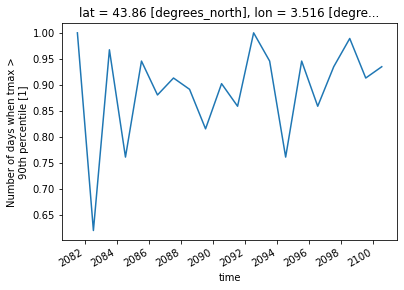

In [4]:
# Slice the data spatially using a single lat/lon point
one_point = tx90_xr["TX90p"].sel(lat=latitude, lon=longitude)
print(one_point)
# Use xarray to create a quick time series plot
one_point.plot.line()
plt.show()

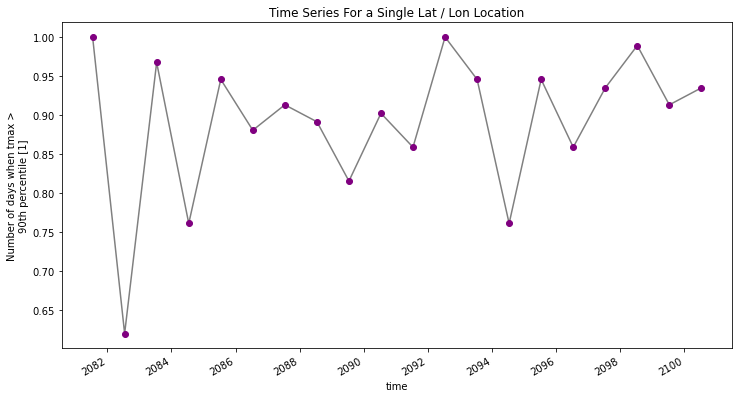

In [5]:
# You can clean up your plot as you wish using standard matplotlib approaches
f, ax = plt.subplots(figsize=(12, 6))
one_point.plot.line(hue='lat',
                    marker="o",
                    ax=ax,
                    color="grey",
                    markerfacecolor="purple",
                    markeredgecolor="purple")
ax.set(title="Time Series For a Single Lat / Lon Location")

# Uncomment the line below if you wish to export the figure as a .png file
# plt.savefig("single_point_timeseries.png")
plt.show()

In [6]:
# Convert to dataframe -- then this can easily be exported to a csv
one_point_df = one_point.to_dataframe()
# View just the first 5 rows of the data
one_point_df.head()

# Export data to .csv file
#one_point_df.to_csv("one-location.csv")

lat       lon  height     TX90p
time                                                      
2081-07-16 12:00:00  43.859545  3.515625     2.0  1.000000
2082-07-16 12:00:00  43.859545  3.515625     2.0  0.619565
2083-07-16 12:00:00  43.859545  3.515625     2.0  0.967391
2084-07-16 12:00:00  43.859545  3.515625     2.0  0.760870
2085-07-16 12:00:00  43.859545  3.515625     2.0  0.945652

In [7]:
# Time subsetting: this is just an example on how to do it
start_date = "2081-01-01"
end_date = "2082-12-31"

tx90_two = tx90_xr["TX90p"].sel(time=slice(start_date, end_date))

In [8]:
# Quickly plot the data using xarray.plot()
tx90_two.plot(x="lon",
              y="lat",
              col='time',
              col_wrap=1)

plt.suptitle("Two Time Steps of TX90P", y=1.03)
plt.show()

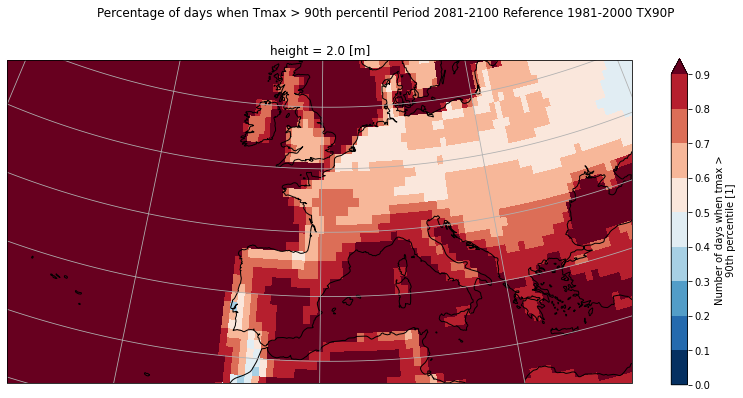

In [9]:
# Set spatial extent and centre
central_lat = 47.0
central_lon = 1.0
extent = [-30, 30, 30, 56]  # Western Europe

tx90 = tx90_xr["TX90p"]

# Calculate time average
tx90_avg = tx90.mean(dim='time', keep_attrs=True)

# Set plot projection
map_proj = ccrs.AlbersEqualArea(central_longitude=central_lon,
                                central_latitude=central_lat)

# Define plot
f, ax = plt.subplots(figsize=(14, 6),
                     subplot_kw={'projection': map_proj})

# Plot data with proper colormap scale range
levels = np.arange(0, 1.0, 0.1)
p = tx90_avg.plot(levels=levels,
                cmap='RdBu_r',
                transform=ccrs.PlateCarree())

# Plot information
plt.suptitle("Percentage of days when Tmax > 90th percentil Period 2081-2100 Reference 1981-2000 TX90P", y=1)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig('c4i_tx90p_icclim.png')

In [10]:
# Re-order longitude so that there is no blank line at 0 deg because 0 deg is within our spatial selection
tx90_avg.coords['lon'] = (tx90_avg.coords['lon'] + 180) % 360 - 180
tx90_avg = tx90_avg.sortby(tx90_avg.lon)

# Define plot
f, ax = plt.subplots(figsize=(14, 6),
                     subplot_kw={'projection': map_proj})

# Define colorscale
levels = np.arange(0, 1.0, 0.1)

# Contours lines
p = tx90_avg.plot.contour(levels=levels,
                          colors='k',
                          linewidths=0.5,
                          transform=ccrs.PlateCarree())

# Contour filled colors
p = tx90_avg.plot.contourf(levels=levels,
                           cmap='RdBu_r',
                           extend='both',
                           transform=ccrs.PlateCarree())

# Plot information
plt.suptitle("Percentage of days when Tmax > 90th percentil Period 2081-2100 Reference 1981-2000 TX90P", y=1)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig('c4i_tx90p_contours_icclim.png')